In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Config Comparison

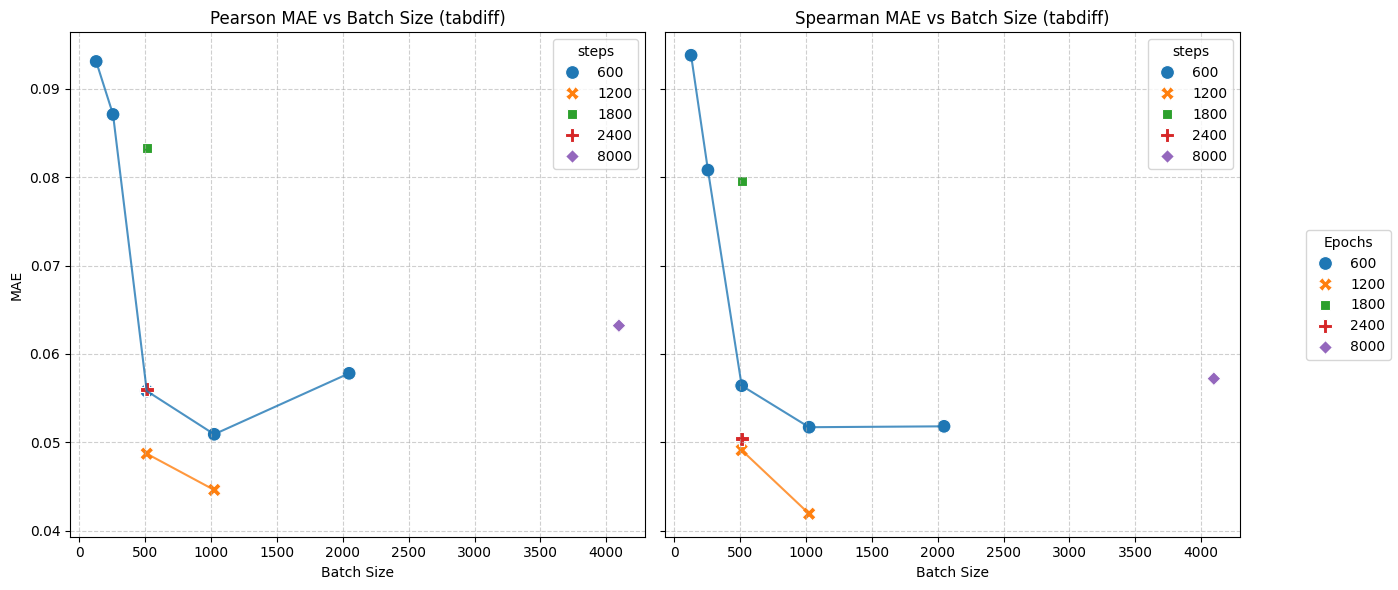

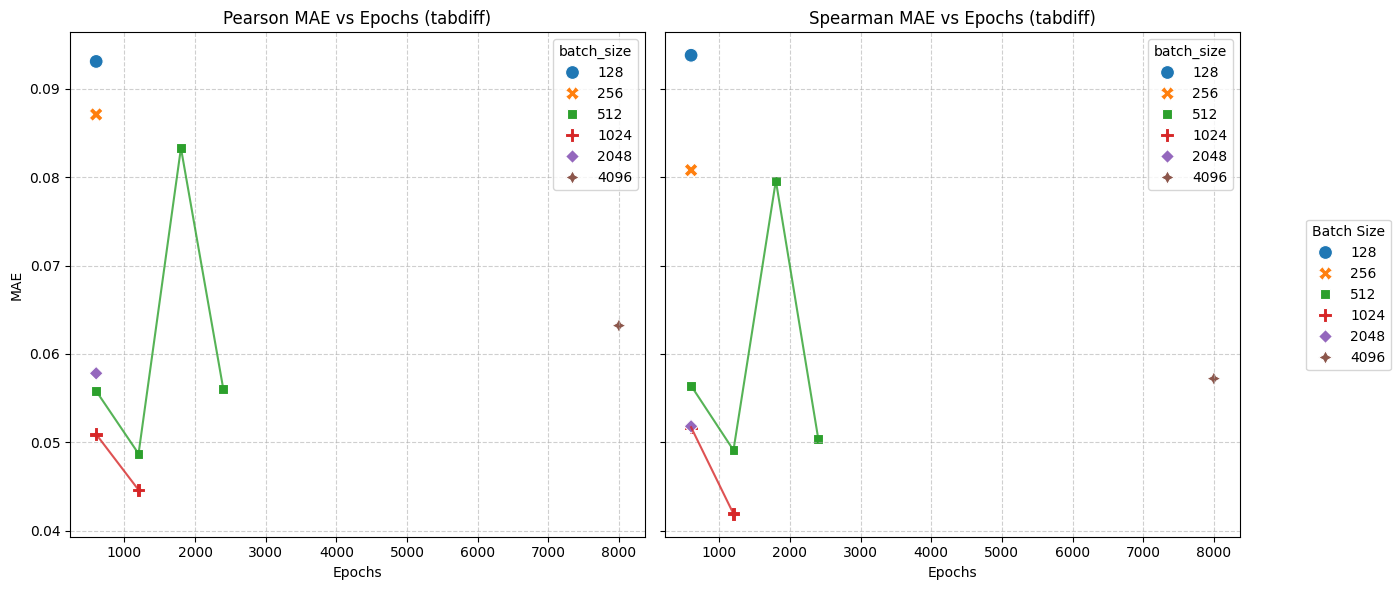

In [2]:
tabdiff_log_df = pd.read_csv("Experiment_logs/experiment_log_tabdiff.csv")

# Keeping first run per (epochs, batch_size)
tabdiff_best = tabdiff_log_df.groupby(["steps", "batch_size"], as_index=False).first()

# Chart 1: Batch size on x-axis, grouped by epochs
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=tabdiff_best,
    x="batch_size",
    y="pearson_mae",
    hue="steps",
    style="steps",
    s=100,
    palette="tab10",
    ax=axes[0]
)
sns.lineplot(
    data=tabdiff_best,
    x="batch_size",
    y="pearson_mae",
    hue="steps",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Pearson MAE vs Batch Size (tabdiff)")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("MAE")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.scatterplot(
    data=tabdiff_best,
    x="batch_size",
    y="spearman_mae",
    hue="steps",
    style="steps",
    s=100,
    palette="tab10",
    ax=axes[1]
)
sns.lineplot(
    data=tabdiff_best,
    x="batch_size",
    y="spearman_mae",
    hue="steps",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Spearman MAE vs Batch Size (tabdiff)")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Epochs", loc="center right")

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

# Chart 2: Epochs on x-axis, grouped by batch size 
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=tabdiff_best,
    x="steps",
    y="pearson_mae",
    hue="batch_size",
    style="batch_size",
    s=100,
    palette="tab10",
    ax=axes[0]
)
sns.lineplot(
    data=tabdiff_best,
    x="steps",
    y="pearson_mae",
    hue="batch_size",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Pearson MAE vs Epochs (tabdiff)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.scatterplot(
    data=tabdiff_best,
    x="steps",
    y="spearman_mae",
    hue="batch_size",
    style="batch_size",
    s=100,
    palette="tab10",
    ax=axes[1]
)
sns.lineplot(
    data=tabdiff_best,
    x="steps",
    y="spearman_mae",
    hue="batch_size",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Spearman MAE vs Epochs (tabdiff)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Batch Size", loc="center right")

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


In [3]:
import pandas as pd

tabdiff_log = pd.read_csv("Experiment_logs/experiment_log_tabdiff.csv")

# Selecting the last 3 rows (best configs)
best_configs = tabdiff_log.tail(3)

# Compute median Pearson & Spearman MAE
median_mae = best_configs[["pearson_mae", "spearman_mae"]].median()

print("Median MAE of best configs:")
print(median_mae)


Median MAE of best configs:
pearson_mae     0.0543
spearman_mae    0.0487
dtype: float64


In [4]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed_dedu.csv")
tabdiff_df = pd.read_csv('Data/Synthetic_Datasets/TabDiff/tabdiff_s1200_b1024_lr0.001.csv')

In [5]:
print('TabDiff Dataset')
display(tabdiff_df.head())

TabDiff Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,-0.628933,-0.684343,-0.403514,-0.617539,-0.468657,1.371993,0.495712,-1.265219,0.195921,-0.613385,0.593818,1.353228,white
1,-0.243230,-0.551219,0.009406,-0.126158,0.684875,0.604676,0.689037,-0.832464,-0.425389,-0.546178,0.342271,0.207999,white
2,-0.320370,-0.050023,0.147046,1.681710,-0.418416,-0.200998,0.276657,0.631928,0.009325,-0.686380,-0.160823,0.207999,white
3,-0.474652,-0.899524,-1.969706,0.814362,-0.350249,0.983754,0.630785,-0.107850,-0.438607,0.260304,0.287757,-0.937230,white
4,0.065333,-0.536325,0.215866,0.584870,-0.480823,-1.326355,0.010419,-0.692530,-0.861459,-0.882212,0.761516,0.207999,white


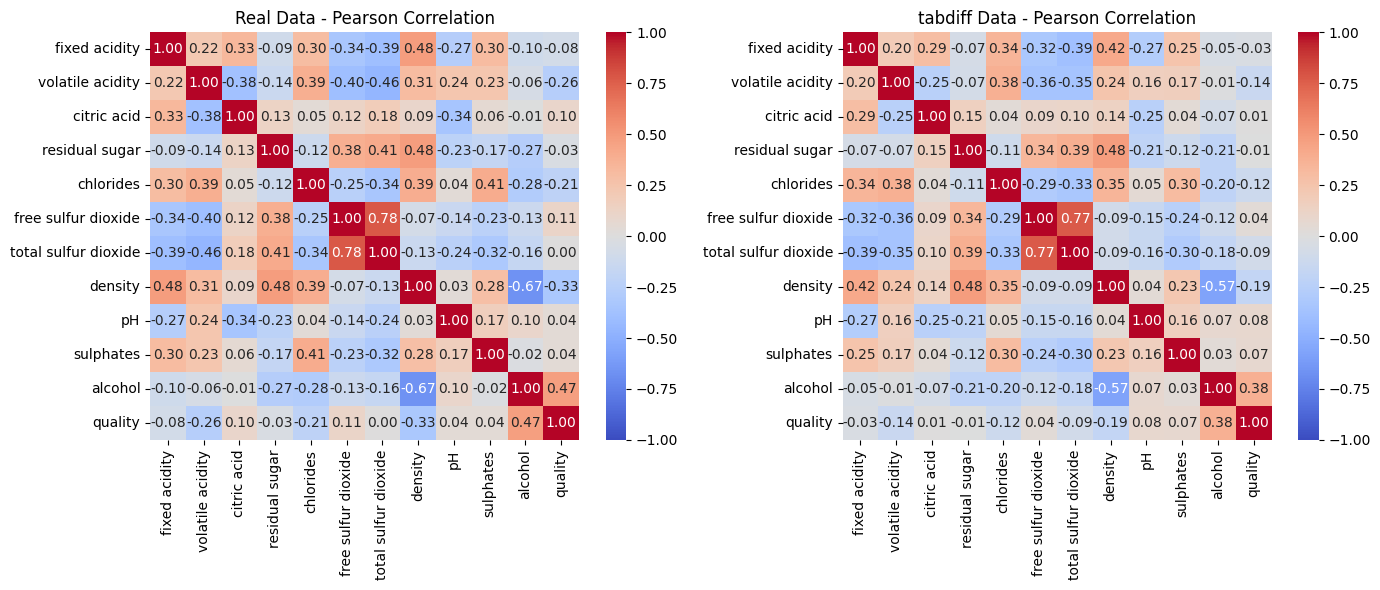

In [6]:
real_num = real_df.select_dtypes(include='number')
tabdiff_num = tabdiff_df.select_dtypes(include='number').drop(columns=['type'], errors='ignore')

real_pearson = real_num.corr(method='pearson')
tabdiff_pearson = tabdiff_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Real Data - Pearson Correlation')

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(tabdiff_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('tabdiff Data - Pearson Correlation')

plt.tight_layout()
plt.show()

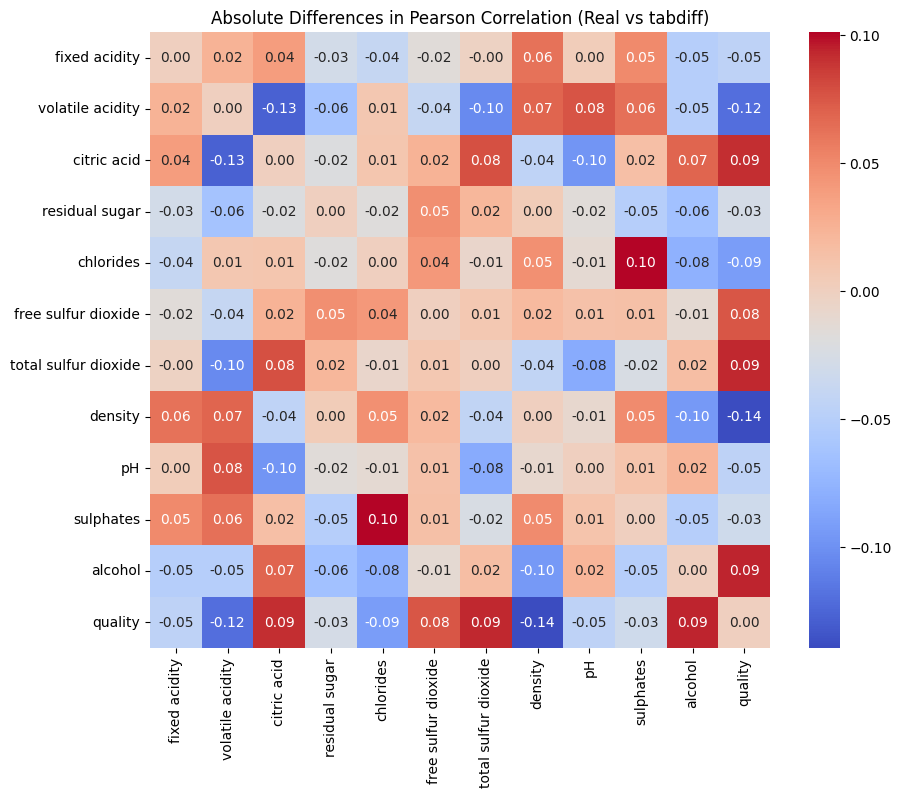

In [7]:

diff_tabdiff = (real_pearson - tabdiff_pearson)
plt.figure(figsize=(10, 8))
sns.heatmap(diff_tabdiff, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Absolute Differences in Pearson Correlation (Real vs tabdiff)")
plt.show()

In [8]:
# Compute absolute differences 
abs_diff = diff_tabdiff.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff (TabDiff):", round(vals.mean(), 3))

# Collect correlation differences with actual values 
records = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    records.append({
        "Metric": "Pearson",
        "Pair": f"{diff_tabdiff.columns[i]} – {diff_tabdiff.columns[j]}",
        "Real": real_pearson.iloc[i, j],
        "Fake": tabdiff_pearson.iloc[i, j],
        "Abs Δ": abs_diff.iloc[i, j]
    })

#  Sort and take top 3 
tabdiff_pearson_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

#  print standalone table 
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Pearson shifts (TabDiff):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in tabdiff_pearson_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))


Mean absolute Pearson diff (TabDiff): 0.047

Top 3 biggest Pearson shifts (TabDiff):

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
density – quality         |   -0.33 |   -0.19 |   0.14
volatile acidity – citric acid |   -0.38 |   -0.25 |   0.13
volatile acidity – quality |   -0.26 |   -0.14 |   0.12
------------------------------------------------------


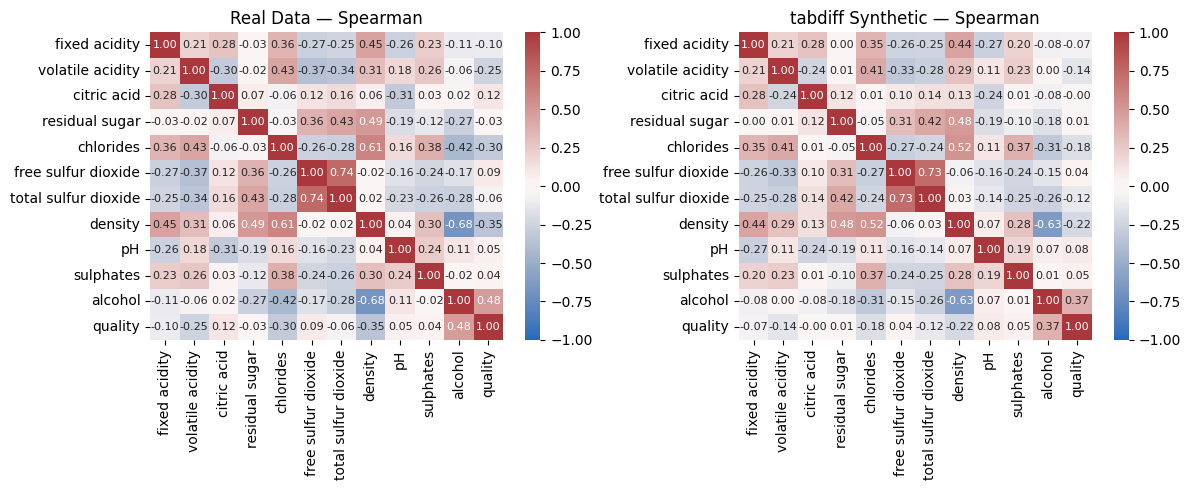

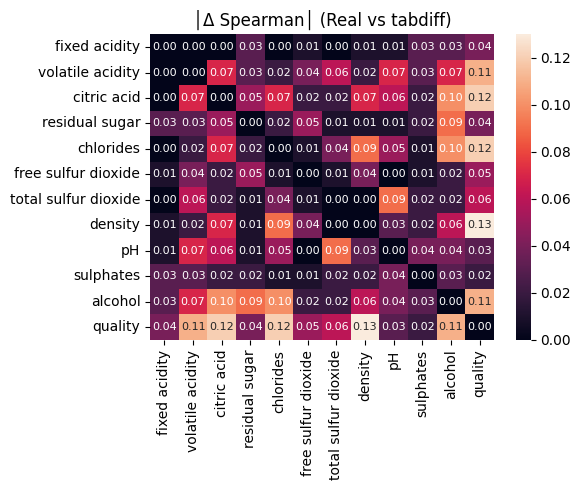

In [9]:
# Spearman correlation matrices 
real_spear = real_num.corr(method="spearman")
tabdiff_spear  = tabdiff_num.corr(method="spearman")

# Plot side by side with numbers (smaller font, 2 decimals)
fig, axes = plt.subplots(1,2,figsize=(12,5), tight_layout=True)
sns.heatmap(real_spear, vmin=-1, vmax=1, center=0, cmap="vlag",
            annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[0])
axes[0].set_title("Real Data — Spearman")

sns.heatmap(tabdiff_spear, vmin=-1, vmax=1, center=0, cmap="vlag",
            annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[1])
axes[1].set_title("tabdiff Synthetic — Spearman")

plt.show()

# Compute & plot absolute‐difference
diff_spear = (tabdiff_spear - real_spear).abs().round(2)
plt.figure(figsize=(6,5))
sns.heatmap(diff_spear, vmin=0, vmax=diff_spear.values.max(), cmap="rocket",
            annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("│Δ Spearman│ (Real vs tabdiff)")
plt.tight_layout()
plt.show()


In [10]:
i,j = np.triu_indices_from(diff_spear, k=1)
print("Mean │Δ Spearman│:", diff_spear.values[i,j].mean().round(3))

Mean │Δ Spearman│: 0.041


In [11]:
#  Extract top 3 biggest Spearman shifts 
i, j = np.triu_indices_from(diff_spear, k=1)
pairs = [
    {
        "Metric": "Spearman",
        "Pair": f"{diff_spear.columns[i_]} – {diff_spear.columns[j_]}",
        "Real": real_spear.values[i_, j_],
        "Fake": tabdiff_spear.values[i_, j_],
        "Abs Δ": diff_spear.values[i_, j_]
    }
    for i_, j_ in zip(i, j)
]

tabdiff_spear_top3 = sorted(pairs, key=lambda x: x["Abs Δ"], reverse=True)[:3]

#  Pretty print standalone table 
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Spearman shifts (TabDiff):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in tabdiff_spear_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))



Top 3 biggest Spearman shifts (TabDiff):

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
density – quality         |   -0.35 |   -0.22 |   0.13
citric acid – quality     |    0.12 |   -0.00 |   0.12
chlorides – quality       |   -0.30 |   -0.18 |   0.12
------------------------------------------------------


Distance correlation

In [12]:
import numpy as np

# 1- fast distance covariance
def fast_dcov(x, y):
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    n = len(x)
    
    # Sort x
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    
    # Row sums of distance matrix of x
    si = np.cumsum(x)
    s = si[-1]
    ax = (-(n-2) + 2*np.arange(n)) * x + (s - 2*si)
    
    # Weight matrix
    v = np.column_stack((x, y, x*y))
    nw = v.shape[1]
    
    idx_buf = np.zeros((n, 2), dtype=int)
    idx_buf[:, 0] = np.arange(n)
    
    iv1 = np.zeros(n)
    iv2 = np.zeros(n)
    iv3 = np.zeros(n)
    iv4 = np.zeros(n)
    
    i = 1
    r, s_idx = 0, 1
    while i < n:
        gap = 2 * i
        k = 0
        idxr = idx_buf[:, r]
        csumv = np.vstack([np.zeros((1, nw)), np.cumsum(v[idxr], axis=0)])
        
        for j in range(0, n, gap):
            st1 = j
            e1 = min(st1 + i - 1, n-1)
            st2 = j + i
            e2 = min(st2 + i - 1, n-1)
            
            while st1 <= e1 and st2 <= e2:
                idx1 = idxr[st1]
                idx2 = idxr[st2]
                if y[idx1] >= y[idx2]:
                    idx_buf[k, s_idx] = idx1
                    st1 += 1
                else:
                    idx_buf[k, s_idx] = idx2
                    iv1[idx2] += e1 - st1 + 1
                    iv2[idx2] += csumv[e1+1, 0] - csumv[st1, 0]
                    iv3[idx2] += csumv[e1+1, 1] - csumv[st1, 1]
                    iv4[idx2] += csumv[e1+1, 2] - csumv[st1, 2]
                    st2 += 1
                k += 1
            
            # Copy leftovers
            if st1 <= e1:
                idx_buf[k:k+e1-st1+1, s_idx] = idxr[st1:e1+1]
                k += e1-st1+1
            elif st2 <= e2:
                idx_buf[k:k+e2-st2+1, s_idx] = idxr[st2:e2+1]
                k += e2-st2+1
                
        i = gap
        r, s_idx = s_idx, r
    
    covterm = n * np.sum((x - np.mean(x)) * (y - np.mean(y)))
    c1 = np.dot(iv1, v[:, 2])
    c2 = np.sum(iv4)
    c3 = np.dot(iv2, y)
    c4 = np.dot(iv3, x)
    d = 4 * ((c1 + c2) - (c3 + c4)) - 2 * covterm
    
    ySorted = y[idx_buf[n-1::-1, r]]
    si_y = np.cumsum(ySorted)
    s_y = si_y[-1]
    by = np.zeros(n)
    by[idx_buf[n-1::-1, r]] = (-(n-2) + 2*np.arange(n)) * ySorted + (s_y - 2*si_y)
    
    nsq = n * n
    ncb = nsq * n
    nq = ncb * n
    term1 = d / nsq
    term2 = 2 * np.dot(ax, by) / ncb
    term3 = np.sum(ax) * np.sum(by) / nq
    
    covsq = (term1 + term3) - term2
    return covsq

#2 - distance correlation matrix for tabular data
def distance_correlation_matrix(data):
    data = np.asarray(data)
    n_features = data.shape[1]
    dcor_mat = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(i, n_features):
            x = data[:, i]
            y = data[:, j]
            dcov_xy = fast_dcov(x, y)
            dcov_xx = fast_dcov(x, x)
            dcov_yy = fast_dcov(y, y)
            dcor = np.sqrt(dcov_xy / np.sqrt(dcov_xx * dcov_yy)) if dcov_xx > 0 and dcov_yy > 0 else 0
            dcor_mat[i, j] = dcor
            dcor_mat[j, i] = dcor

    return dcor_mat


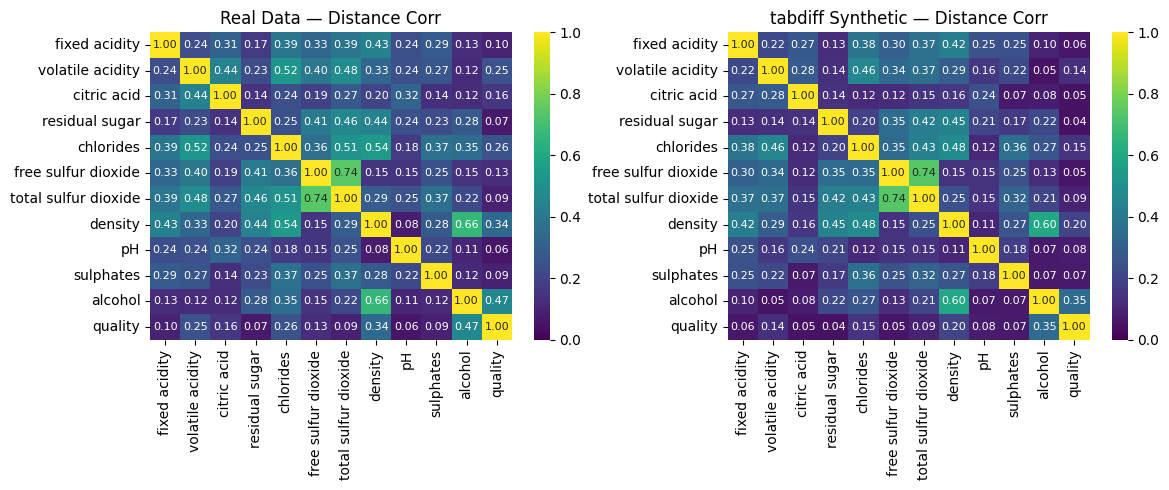

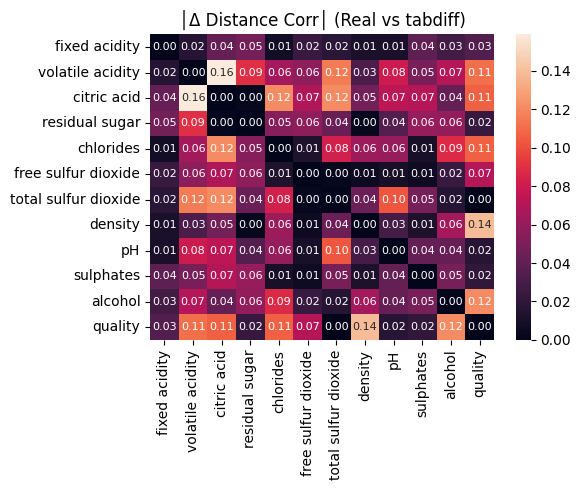


Top 3  biggest Distance Corr shifts:

----------------------------------------------------------------------------------
Feature 1                 | Feature 2                 |    Real |    Fake |  Abs Δ
----------------------------------------------------------------------------------
volatile acidity          | citric acid               |    0.44 |    0.28 |   0.16
density                   | quality                   |    0.34 |    0.20 |   0.14
citric acid               | chlorides                 |    0.24 |    0.12 |   0.12
----------------------------------------------------------------------------------


In [13]:
# Compute distance correlation matrices for real and fake 
real_dcor = distance_correlation_matrix(real_num.values)
fake_dcor = distance_correlation_matrix(tabdiff_num.values)

real_dcor = pd.DataFrame(real_dcor, index=real_num.columns, columns=real_num.columns)
fake_dcor = pd.DataFrame(fake_dcor, index=tabdiff_num.columns, columns=tabdiff_num.columns)

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12,5), tight_layout=True)
sns.heatmap(real_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[0])
axes[0].set_title("Real Data — Distance Corr")

sns.heatmap(fake_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[1])
axes[1].set_title("tabdiff Synthetic — Distance Corr")

plt.show()

# Difference heatmap 
diff_dcor = (real_dcor - fake_dcor).abs().round(3)
plt.figure(figsize=(6,5))
sns.heatmap(diff_dcor, vmin=0, vmax=diff_dcor.values.max(), cmap="rocket",
            annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("│Δ Distance Corr│ (Real vs tabdiff)")
plt.tight_layout()
plt.show()

#  Extract top 5 biggest shifts 
i, j = np.triu_indices_from(diff_dcor, k=1)
pairs = [
    (diff_dcor.values[i_, j_],
     real_dcor.values[i_, j_],
     fake_dcor.values[i_, j_],
     diff_dcor.columns[i_],
     diff_dcor.columns[j_])
    for i_, j_ in zip(i, j)
]
top3 = sorted(pairs, key=lambda x: x[0], reverse=True)[:3]

#  print as table
col_width = 25
header = f"{'Feature 1':<{col_width}} | {'Feature 2':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3  biggest Distance Corr shifts:\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for delta, real_val, fake_val, f1, f2 in top3:
    print(f"{f1:<{col_width}} | {f2:<{col_width}} | {real_val:>7.2f} | {fake_val:>7.2f} | {delta:>6.2f}")
print("-" * len(header))


In [14]:
# MAE for distance correlation 
vals = diff_dcor.values[np.triu_indices_from(diff_dcor, k=1)]
mae_dcor = vals.mean()
print("Mean absolute Distance Corr diff (MAE):", round(mae_dcor, 3))


Mean absolute Distance Corr diff (MAE): 0.051


In [15]:
#  Extract top 3 biggest Distance Corr shifts 
i, j = np.triu_indices_from(diff_dcor, k=1)
pairs = [
    {
        "Metric": "Distance Corr",
        "Pair": f"{diff_dcor.columns[i_]} – {diff_dcor.columns[j_]}",
        "Real": real_dcor.values[i_, j_],
        "Fake": fake_dcor.values[i_, j_],
        "Abs Δ": diff_dcor.values[i_, j_]
    }
    for i_, j_ in zip(i, j)
]

tabdiff_dcor_top3 = sorted(pairs, key=lambda x: x["Abs Δ"], reverse=True)[:3]

#  print standalone table
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Distance Corr shifts (TabDiff):\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in tabdiff_dcor_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))



Top 3 biggest Distance Corr shifts (TabDiff):

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
volatile acidity – citric acid |    0.44 |    0.28 |   0.16
density – quality         |    0.34 |    0.20 |   0.14
citric acid – chlorides   |    0.24 |    0.12 |   0.12
------------------------------------------------------


In [16]:
from tabulate import tabulate
import pandas as pd

def pretty_print_tool_table(tool_name, metrics_dict):
    rows = []
    for metric, records in metrics_dict.items():
        df = pd.DataFrame(records)
        df = df[["Pair", "Real", "Fake", "Abs Δ"]]

        for idx, row in df.iterrows():
            rows.append([
                tool_name if idx == df.index[0] and metric == list(metrics_dict.keys())[0] else "",
                metric if idx == df.index[0] else "",
                row["Pair"],
                f"{row['Real']:.3f}",
                f"{row['Fake']:.3f}",
                f"{row['Abs Δ']:.3f}"
            ])
        # separator between metrics
        rows.append(["", "-"*10, "-"*20, "-"*5, "-"*5, "-"*5])

    headers = ["Tool", "Metric", "Pair", "Real", "Fake", "Abs Δ"]
    print(tabulate(rows, headers=headers, tablefmt="pretty"))

#  Collect TabDiff top-3 into dict
tabdiff_top3 = {
    "Pearson": tabdiff_pearson_top3,
    "Spearman": tabdiff_spear_top3,
    "Distance Corr": tabdiff_dcor_top3
}

# Print grouped table for TabDiff
pretty_print_tool_table("TabDiff", tabdiff_top3)


+---------+---------------+--------------------------------+--------+--------+-------+
|  Tool   |    Metric     |              Pair              |  Real  |  Fake  | Abs Δ |
+---------+---------------+--------------------------------+--------+--------+-------+
| TabDiff |    Pearson    |       density – quality        | -0.326 | -0.187 | 0.140 |
|         |               | volatile acidity – citric acid | -0.377 | -0.249 | 0.128 |
|         |               |   volatile acidity – quality   | -0.264 | -0.143 | 0.121 |
|         |  ----------   |      --------------------      | -----  | -----  | ----- |
|         |   Spearman    |       density – quality        | -0.349 | -0.216 | 0.130 |
|         |               |     citric acid – quality      | 0.116  | -0.001 | 0.120 |
|         |               |      chlorides – quality       | -0.304 | -0.185 | 0.120 |
|         |  ----------   |      --------------------      | -----  | -----  | ----- |
|         | Distance Corr | volatile acidit

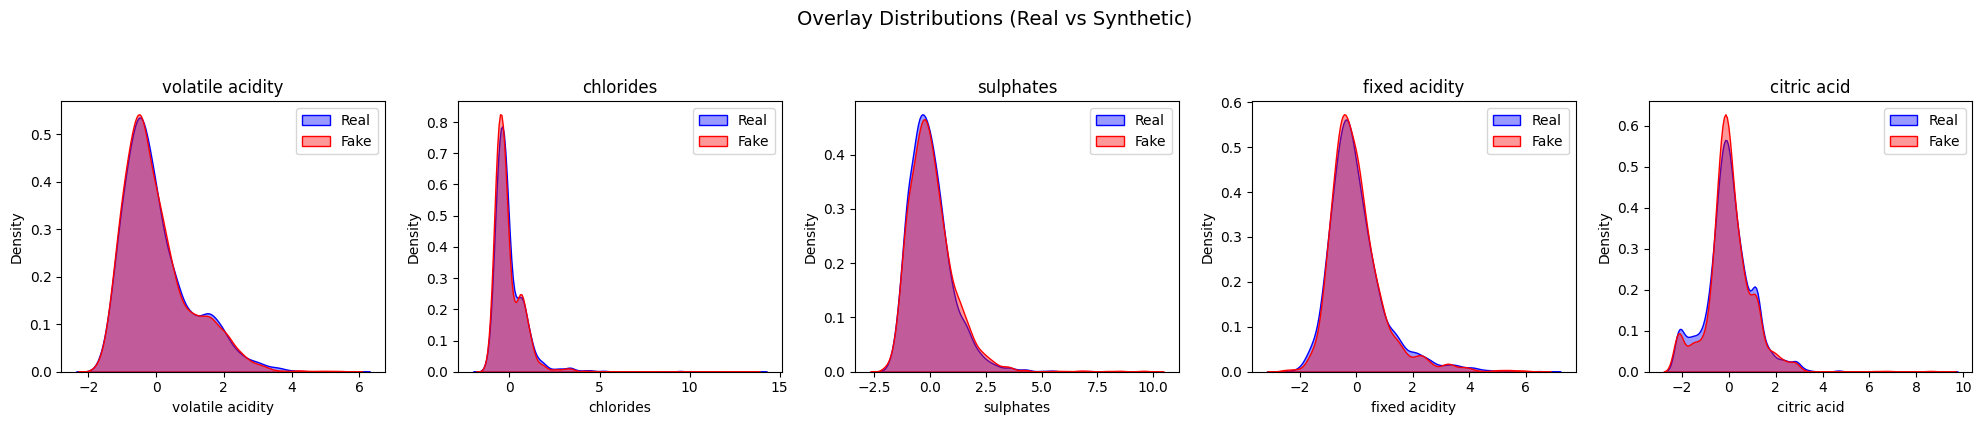

In [17]:
features = ["volatile acidity", "chlorides", "sulphates", "fixed acidity", "citric acid"]

fig, axes = plt.subplots(1, len(features), figsize=(4*len(features), 4), tight_layout=True)

for idx, feat in enumerate(features):
    sns.kdeplot(real_num[feat], fill=True, color="blue", label="Real", ax=axes[idx], alpha=0.4)
    sns.kdeplot(tabdiff_num[feat], fill=True, color="red", label="Fake", ax=axes[idx], alpha=0.4)
    axes[idx].set_title(feat)
    axes[idx].legend()

plt.suptitle("Overlay Distributions (Real vs Synthetic)", fontsize=14, y=1.05)
plt.show()


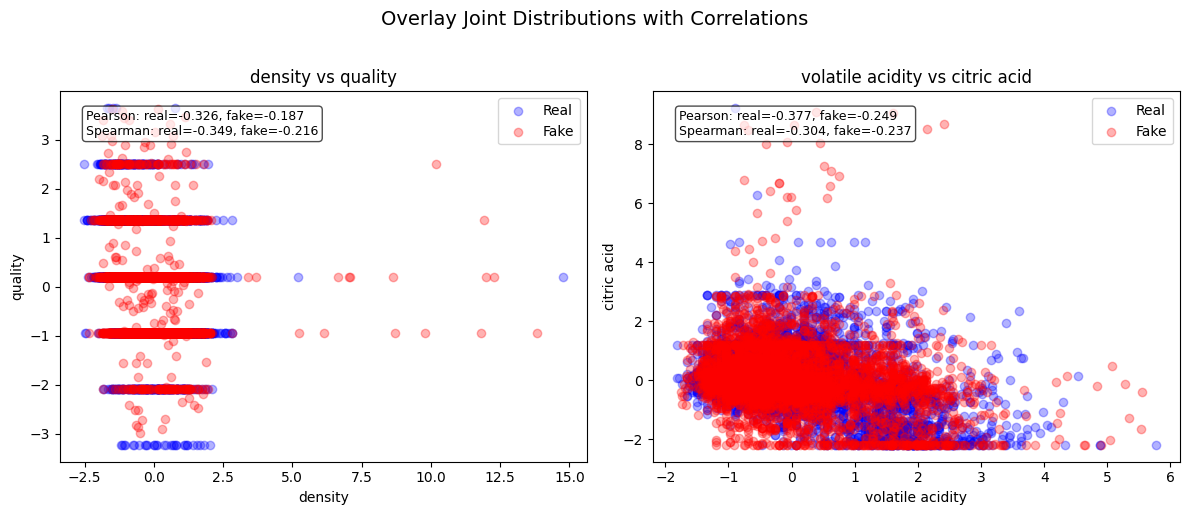

In [18]:
from scipy.stats import spearmanr

pairs = [
    ("density", "quality"),
    ("volatile acidity", "citric acid")
]

fig, axes = plt.subplots(1, len(pairs), figsize=(6*len(pairs), 5), tight_layout=True)

for idx, (f1, f2) in enumerate(pairs):
    # --- Scatter overlay ---
    axes[idx].scatter(real_num[f1], real_num[f2], alpha=0.3, color="blue", label="Real")
    axes[idx].scatter(tabdiff_num[f1], tabdiff_num[f2], alpha=0.3, color="red", label="Fake")

    axes[idx].set_title(f"{f1} vs {f2}")
    axes[idx].set_xlabel(f1)
    axes[idx].set_ylabel(f2)

    # --- Compute correlations ---
    pear_real = real_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    pear_fake = tabdiff_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    spear_real, _ = spearmanr(real_num[f1], real_num[f2])
    spear_fake, _ = spearmanr(tabdiff_num[f1], tabdiff_num[f2])

    # --- Annotate on plot ---
    textstr = (f"Pearson: real={pear_real:.3f}, fake={pear_fake:.3f}\n"
               f"Spearman: real={spear_real:.3f}, fake={spear_fake:.3f}")
    axes[idx].text(0.05, 0.95, textstr, transform=axes[idx].transAxes,
                   fontsize=9, va="top", ha="left",
                   bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

    axes[idx].legend()

plt.suptitle("Overlay Joint Distributions with Correlations", fontsize=14, y=1.02)
plt.show()
